In [208]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    average_precision_score,
    classification_report,
    confusion_matrix,
    f1_score,
)
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle

In [ ]:
RNG = np.random.default_rng(42)
MODEL = RandomForestClassifier()

X, y = make_classification(
    n_samples=10000,
    n_features=20,
    n_informative=2,
    n_redundant=2,
    n_clusters_per_class=1,
    weights=[0.95, 0.05],
    flip_y=0,
    random_state=42,
    class_sep=0.2,
)

data = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
data["target"] = y
val_data = data.iloc[8000:].copy()
data = data.iloc[:8000].copy()

X_val = val_data.drop("target", axis=1)
y_val = val_data["target"]

X = data.drop("target", axis=1)
y = data["target"]

target
0    7597
1     403
Name: count, dtype: int64

f1 score : 0.5109489051094891
average_precision_score: 0.3467216494845361


0  
0.0    1212
1.0     403
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



f1 score : 0.6025641025641025
average_precision_score: 0.4109863707845536


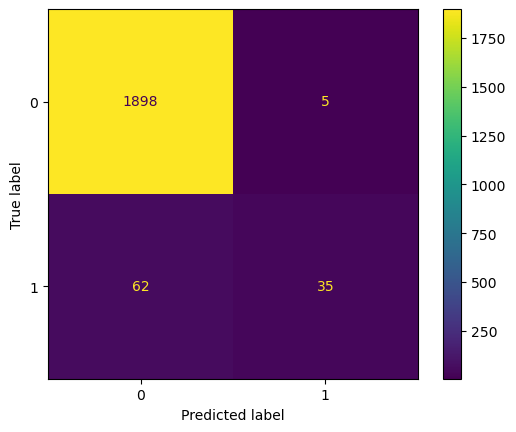

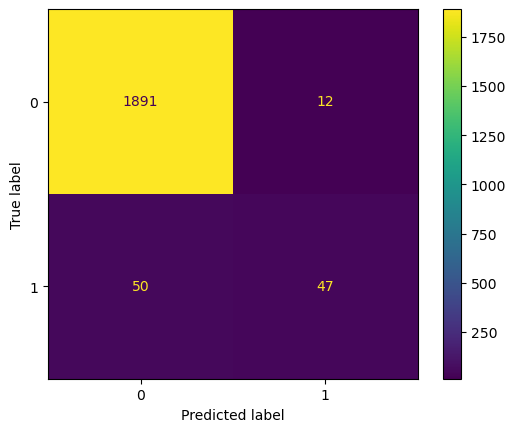

In [265]:

# Étape 1 : Modèle Pilote
def create_balanced_dataset(X, y):



# Étape 2 : Scoring des Échantillons
def score_samples(model, X_majority):



# Étape 3 : Échantillonnage Proportionnel
def proportional_sampling(X_majority, scores, sampling_rate=0.1):
    # Sélectionner les échantillons de la classe majoritaire de manière proportionnelle à leurs scores



# Étape 4 : Correction de la Fonction de Vraisemblance
def train_final_model(X_train, y_train, probs):
    # Entraîner le modèle final avec correction de la fonction de vraisemblance


X, y = make_classification(
    n_samples=10000,
    n_features=20,
    n_informative=2,
    n_redundant=2,
    n_clusters_per_class=1,
    weights=[0.95, 0.05],
    flip_y=0,
    random_state=42,
    class_sep=0.2,
)

data = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
data["target"] = y
val_data = data.iloc[8000:].copy()
data = data.iloc[:8000].copy()

X_val = val_data.drop("target", axis=1)
y_val = val_data["target"]

X = data.drop("target", axis=1)
y = data["target"]


display(data["target"].value_counts())

X_majority = X[y == 0]
X_minority = X[y == 1]


bench_model = MODEL
bench_model.fit(X, y)

# check results benchmark
y_pred = bench_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(f"f1 score : {f1_score(y_val, y_pred)}")
print(f"average_precision_score: {average_precision_score(y_val, y_pred)}")
# Étape 1 : Créer un dataset équilibré et entraîner un modèle pilote
X_balanced, y_balanced = create_balanced_dataset(X, y)


# Étape 2 : Attribuer des scores aux échantillons de la classe majoritaire
scores = score_samples(pilot_model, X_majority)

# Étape 3 : Sélectionner les échantillons proportionnellement à leurs scores
X_sampled_majority, probs = proportional_sampling(X_majority.values, scores, sampling_rate=0.7)

# Créer le nouveau dataset échantillonné
X_new = np.vstack((X_sampled_majority, X_minority.values))
y_new = np.hstack((np.zeros(len(X_sampled_majority)), np.ones(len(X_minority))))
probs = np.hstack((probs, np.ones(X_minority.shape[0])))
display(pd.DataFrame(y_new).value_counts())


# Étape 4 : Entraîner le modèle final avec le nouveau dataset échantillonné
X_new, y_new, probs = shuffle(X_new, y_new, probs)
final_model = train_final_model(X_new, y_new, probs)

# Évaluer le modèle final
y_pred = final_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(f"f1 score : {f1_score(y_val, y_pred)}")
print(f"average_precision_score: {average_precision_score(y_val, y_pred)}")